# Modeling Diabetes Progression Using Artificial Neural Networks (ANN)

### This assignment focuses on predicting diabetes progression using machine learning techniques. The sklearn diabetes dataset is used to analyze the relationship between various health-related features and disease progression. An Artificial Neural Network (ANN) model is developed, trained, and evaluated to understand how different factors influence diabetes progression.

### Step 1: Loading and Preprocessing

In [ ]:
# Import necessary libraries
import numpy as np  # a Python library used for numerical calculations
import pandas as pd #used for data handling and analysis, like excel
from sklearn.datasets import load_diabetes #import data from sklearn
from sklearn.model_selection import train_test_split # split data into training and testing sets ( training /testing data)
from sklearn.preprocessing import StandardScaler  # used to scale/standardize data

In [ ]:
# Load the dataset
diabetes = load_diabetes()
X = diabetes.data  # only patient details
y = diabetes.target # result of input

In [ ]:
# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=diabetes.feature_names) # Converts X (NumPy array) into a Pandas DataFrame Assigns column names to each feature
df['target'] = y # Adds a new column called target Stores output values (y) in it



In [14]:
# Check for missing values
print("Missing values in dataset:\n", df.isnull().sum() )

Missing values in dataset:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [16]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Converts all features to a common scale data in x

### Step 2: Exploratory Data Analysis (EDA)


In [18]:
import matplotlib.pyplot as plt # used for creating graphs and plots
import seaborn as sns # advanced, attractive visualization

# Matplotlib and Seaborn are visualization libraries used to create graphs and plots for exploratory data analysis

c:\Users\Favas v\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


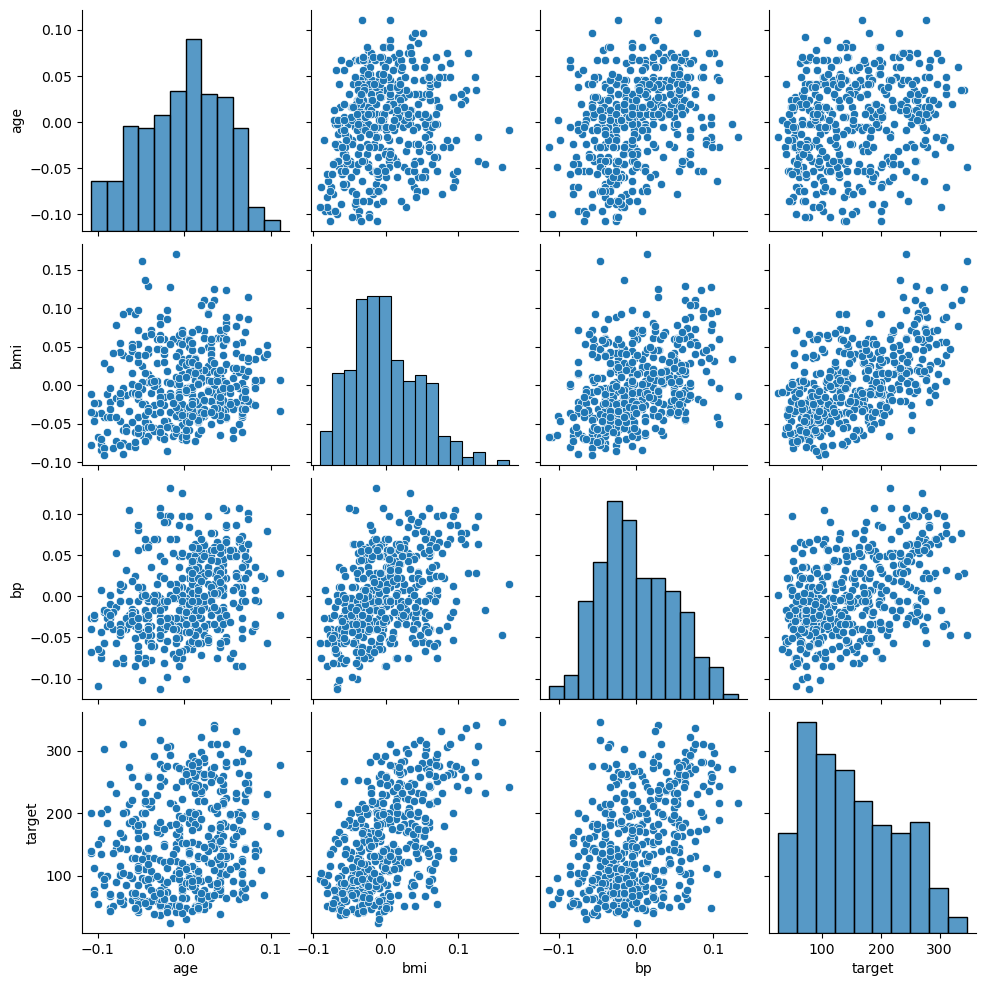

In [ ]:
# Pairplot of first 3 features with target
sns.pairplot(df[['age', 'bmi', 'bp', 'target']]) # Scatter plots between every pair of variables
plt.show()

# A pairplot is used to visualize the relationships between selected input features and the target variable, helping to understand correlations and data distribution.

### conlcusion

### The pairplot shows that BMI and blood pressure have a slight positive effect on diabetes progression, while age has little effect. Features are mostly independent, which is good for regression modeling

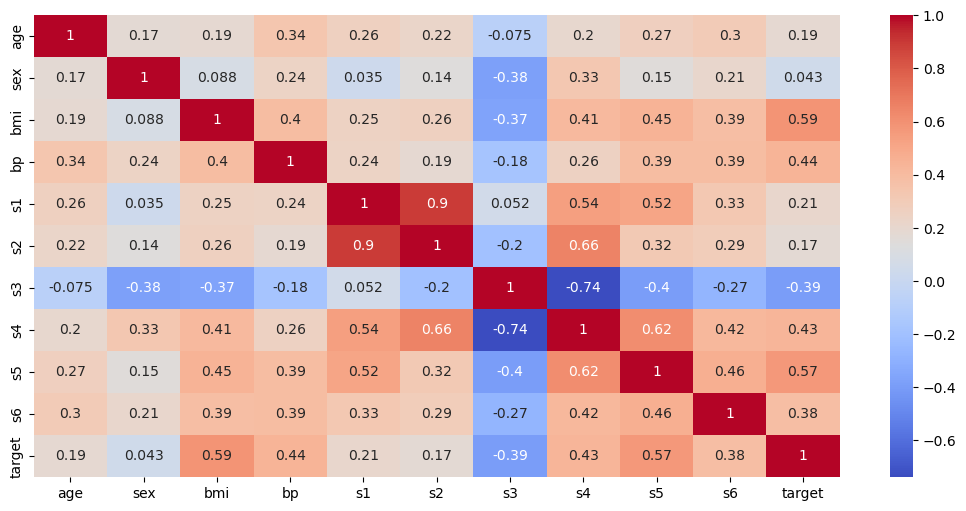

In [22]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### The correlation heatmap shows that BMI, blood pressure, and serum measurement s5 have strong positive correlations with diabetes progression, indicating they are important predictors. Features like age and sex have weak correlations and less influence. Some features, such as s1 and s2, are highly correlated with each other, which may indicate redundancy. Overall, the heatmap helps identify the features that will most impact the ANN model’s predictions.

### Step 3: Building the ANN Model

### splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
 # This function helps divide data into training and testing parts

In [30]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

In [32]:
# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 )

In [33]:
print("Training data shape:", X_train.shape)

Training data shape: (353, 10)


In [34]:
print("Testing data shape:", X_test.shape)

Testing data shape: (89, 10)


In [36]:
# The dataset was split into training and testing sets using an 80–20 ratio to evaluate the model performance on unseen data.

### FEATURE SCALING

In [38]:
#train data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### BUILDING THE ANN MODEL

In [40]:
from sklearn.neural_network import MLPRegressor

ann_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu', # Useful information → pass forward , Useless information → block it
    solver='adam', # Learns from past errors
                   # Adjusts learning speed automatically
                   # Reaches solution faster
    max_iter=500, #How many times the model is allowed to practice.
    random_state=42
)

### Each hidden layer neuron learns a different pattern from the input features, and increasing the number of neurons allows the ANN to capture more complex relationships between patient attributes and diabetes progression.

### TRAINING THE ANN MODEL

In [41]:
ann_model.fit(X_train_scaled, y_train)

c:\Users\Favas v\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

### EVALUATING THE MODEL

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score #These help us measure how good our ANN predictions are.

y_pred = ann_model.predict(X_test_scaled) #The model predicts diabetes progression values for new patients.

mse = mean_squared_error(y_test, y_pred) # Measures average squared difference between, How large the prediction errors are
r2 = r2_score(y_test, y_pred) #Shows how well the model explains the data

In [43]:
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2761.7964029297195


### The ANN model produced a Mean Squared Error (MSE) of 2761.8, corresponding to an average prediction error of approximately 53 units, indicating reasonable performance for a baseline neural network model.”

In [44]:
print("R² Score:", r2)

R² Score: 0.4787245564072454


### The R² score of 0.48 suggests that the ANN model is able to capture a moderate relationship between the input features and diabetes progression

### IMPROVING THE ANN MODEL

In [45]:
# Improved ANN model
ann_model_improved = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

# Train improved model
ann_model_improved.fit(X_train_scaled, y_train)


c:\Users\Favas v\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42)

In [46]:
y_pred_improved = ann_model_improved.predict(X_test_scaled)

mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print("Improved Model MSE:", mse_improved)
print("Improved Model R²:", r2_improved)


Improved Model MSE: 5204.074082579808
Improved Model R²: 0.017756695240587095


In [47]:
print("Original MSE:", mse)
print("Improved MSE:", mse_improved)

print("Original R²:", r2)
print("Improved R²:", r2_improved)


Original MSE: 2761.7964029297195
Improved MSE: 5204.074082579808
Original R²: 0.4787245564072454
Improved R²: 0.017756695240587095


In [48]:
ann_model_tuned = MLPRegressor(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='adam',
    alpha=0.01,          # Regularization
    max_iter=800,
    random_state=42
)

ann_model_tuned.fit(X_train_scaled, y_train)

y_pred_tuned = ann_model_tuned.predict(X_test_scaled)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned Model MSE:", mse_tuned)
print("Tuned Model R²:", r2_tuned)


Tuned Model MSE: 2822.2752298665955
Tuned Model R²: 0.46730947624201447


c:\Users\Favas v\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


### Conclusion

### An Artificial Neural Network (ANN) was developed to model diabetes progression using the Diabetes dataset from scikit-learn. After preprocessing and exploratory data analysis, the model was trained and evaluated using Mean Squared Error and R² score. Experiments with different ANN architectures showed that simpler models performed better than complex ones due to overfitting. This study demonstrates that ANN models can effectively capture patterns in diabetes progression, while highlighting the importance of appropriate model selection